## <center>Twitter Disaster Tweets</center>

## Problem Defination:                                     


Twitter is an American microblogging and social networking service on which users post and interact with messages known as "tweets". Registered users can post, like, and retweet tweets, but unregistered users can only read them.

Twitter has become an important communication channel in times of emergency.People also twits on the live condition or status. 

__Problem Statement__

* Our job is to create ML model to predict the test set tweets belong to a disater or not in the for of 1 or 0.
* For given twits find out which twits are really digaster twits or not. 


## Source/Useful Links

* Source: https://www.kaggle.com/c/nlp-getting-started

__Useful Links__

* Discussion: https://www.kaggle.com/vbmokin/nlp-eda-bag-of-words-tf-idf-glove-bert

Real world/Business Objectives and Constraints

1. The cost of a mis-classification can be very high.
2. Latency Concerns
3. Interpretability is Partially Important.

### Machine Learning Problem

- Training data will be in a file train.csv
- Train.csv contain 5 columns and 7613 rows.
- Colums are - id, keywords, location, text, target
- Size of Train.csv - 964KB
- Testing Data will be in a test.csv 
- Test.csv contain 4 columns and 3263 rows.
- Columns are - id, keywords, locaiton, text, target

### Example Data point

id,keyword,location,text,target
1,,,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
4,,,Forest fire near La Ronge Sask. Canada,1
5,,,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
6,,,"13,000 people receive #wildfires evacuation orders in California ",1
7,,,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ,1
8,,,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
10,,,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
13,,,I'm on top of the hill and I can see a fire in the woods...,1
14,,,There's an emergency evacuation happening now in the building across the street,1
15,,,I'm afraid that the tornado is coming to our area...,1
16,,,Three people died from the heat wave so far,1

### Mapping the real world problem to an ML problem

Type of Machine Learning Problm:

It is a binary classification problem, for a given twit we need to predict it is disaster twit or not.

__Performance Metric__

Metric(s): Evaluation metrics are used to measure the quality of the statistical or machine learning model. There are many types of evalution metrics availabe to test model. This include accuracy, logarithmic loss, AUC-ROC etc. For this particular problem, our submission will be evaluated using F1-score between predicted and expected answer.
   * __f1-score:__
        F1 = 2 *((precision *recall)/ (precision + recall))
        
        where 
            precision = TP/(TP + FP)
            
            recall = TP / (TP + FN)
           
   * __Precision__ is also called as positive predictive value, is the proportion of positive results that truly are positive.
    
   * __Recall__, also called sensitivity.
    
    
   * Binary Confusion Matrix

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import string 
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

__Reading Data and basic stats__        
What is actually data?


In [ ]:
data = pd.read_csv('../input/nlp-getting-started/train.csv')
print ("Numpber rows:",data.shape[0])


In [ ]:
data.head()

In [ ]:
data.describe(include="all")

__There are 7613 rows and 5 columns__    
__Keyword value present only 7552 times and location value in 5080 times__             
__Location and keyword have null values__                   
__Location USA 104 times and fatalities keywor 45 times__


In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
test = pd.read_csv('../input/nlp-getting-started/test.csv')
print ('Test shape', test.shape)

In [ ]:
test.isnull().sum()

### Distribution of data points among output classes

- Number of disaster twits and non disaster twits in the train

In [ ]:
# what are the classes in the target
np.unique(data.target)

In [ ]:
data['target'].value_counts()

In [ ]:
print ("Total number of data point: ", data.shape[0])

In [ ]:
# What is the percentage of each class
data.target.value_counts()

total = data.shape[0]

print (round(data.target.value_counts(1)[0] * 100,2),"%")
print (round(data.target.value_counts(1)[1] * 100,2),"%")
# Balanced Dataset

__Data is almost balanced__

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Number of points in each class..")

data.groupby("target")['id'].count().plot.bar(colors=(['b','y']))

###  Checking for Duplicates

In [ ]:
data.columns

In [ ]:
#pain_duplicat = data[[ 'keyword', 'location', 'text', 'target']
duplicateRowsDF = data[data.duplicated(['location', 'text', 'target'])]

#duplicateRowsDF

In [ ]:
duplicate_twits = data[['keyword', 'location', 'text']].groupby(['keyword', 'location', 'text']).count().reset_index()

print ("Number of duplicate twits",  data.shape[0] - (duplicate_twits).shape[0])

__What are the keywords__

In [ ]:
print ("Number of unique Keywords: ",len(data.keyword.unique()))
data.keyword.unique()

In [ ]:
data.keyword.value_counts()

In [ ]:
print ("Unique Location:", len(data.location.unique()))
data.location.unique()

In [ ]:
data.location.value_counts().head(30)

In [ ]:
data.text

### What is test data?


In [ ]:
test.describe(include='all')

__In test data in the some text field have NaN value which are not in the train data.__

### Word Cloud 

In [ ]:
# Data Visualization
def cloud(text, title, size = (10,7)):
    # Processing Text
    wordcloud = WordCloud(width=800, height=400,
                          collocations=False
                         ).generate(" ".join(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=25,color='w')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
for i, name in [(0, 'No Disaster'), (1, "Disaster")]:
    print (i)
    cloud(data.loc[data.target == i, "text"].str.title(), title ="{}Wordcloud".format(name), size=[8,5])

__Fill Null Value with__

In [ ]:
#
train = data.fillna('NA')

nan_rows = data[data.isnull().any(1)]

#print (nan_rows)
print ("Number of empty row:", len(nan_rows))


In [ ]:
train.head()

In [ ]:
test = test.fillna('NA')

nan_rows = test[test.isnull().any(1)]

#print (nan_rows)


In [ ]:
def create_corpus_df(tweet, target):
    corpus=[]
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
corpus_new1=create_corpus_df(train,1)
len(corpus_new1)

In [ ]:
train['text'][train.target== 1].str.split(expand=True).stack().value_counts()[0:50]

__How many times each word accure with respect to each class__

In [ ]:
# Dister  word and there class
a = train.loc[train['text'].str.contains('disaster', na=False, case=False)].target.value_counts()
print (a)
print ("Percent of disaster twitts out of total occurance of disater word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Fire word and there class
a = train.loc[train['text'].str.contains('fire', na=False, case = False)].target.value_counts()
print (a)
print ("Percent of disaster twitts out of total occurance of 'fire' word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Bomb word and there class
a = train.loc[train['text'].str.contains('bomb', na=False, case = False)].target.value_counts()
print (a)
print ("Percent of disaster twitts out of total occurance of 'bomb' word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Police word in each class
a = train.loc[train['text'].str.contains('police', na=False, case = False)].target.value_counts()

print (a)
print ("Percent of disaster twitts out of total occurance of 'police' word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Suicide word in each class
a = train.loc[train['text'].str.contains('suicide', na=False, case = False)].target.value_counts()
print (a)
print ("Percent of disaster twitts out of total occurance of 'Police' word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Fire word in each class
a = train.loc[train['text'].str.contains('fire', na=False, case = False)].target.value_counts()

print (a)
print ("Percent of disaster twitts out of total occurance of 'fire' word:",round(a[1]/sum(a) * 100, 2),"%")


In [ ]:
# Bombing word in each class
a = train.loc[train['text'].str.contains('Bombing', na=False, case = False)].target.value_counts()
print (a)
print ("Percent of disaster twitts out of total occurance of 'Bombing' word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Accident word in each class
a = train.loc[train['text'].str.contains('accident', na=False, case = False)].target.value_counts()
print (a)
print ("Percent of disaster twitts out of total occurance of 'accident' word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Fload word in each classl
a = train.loc[train['text'].str.contains('flood', na=False, case = False)].target.value_counts()

print (a)
print ("Percent of disaster twitts out of total occurance of 'flood' word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Kill word in each class
a = train.loc[train['text'].str.contains('kill', na=False, case = False)].target.value_counts()
print (a)
print ("Percent of disaster twitts out of total occurance of 'kill' word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Crash word in each class
a = train.loc[train['text'].str.contains('crash', na=False, case = False)].target.value_counts()
print (a)
print ("Percent of disaster twitts out of total occurance of 'disaster' word:",round(a[1]/sum(a) * 100, 2),"%")

In [ ]:
# Crash word in each class
a = train.loc[train['text'].str.contains('kill', na=False, case = False)].target.value_counts()
print (a)
print ("Percent of disaster twitts out of total occurance of 'disaster' word:",round(a[1]/sum(a) * 100, 2),"%")

### Basic Feature Extraction(Before Cleaning)

Let's now construct a few features like:

* Number of characters
* Number of words in the text
* Number of capital words in the text
* Number of stopwords in the text
* Number of user tags '@' in the text
* Number of # tags in the text
* Number of numerical values in the text
* Number of times fire word
* Number of times Police word
* Number of times accident word
* Number of time attack word
* Number of time bomb word
* Number of time Disaster Word
* Number of time Sucide word

In [ ]:
stopword = stopwords.words('english')

In [ ]:
train['t_len'] = train['text'].str.len()
train['t_words'] = train['text'].apply(lambda row: len(row.split(" ")))

train['n_stopwords'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ")if word in stopword))

train['n_capital'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ") if word.isupper()))

train['n_userTag'] = train['text'].apply(lambda row: sum(1 for c  in row if c == '@'))

train['n_hashTag'] = train['text'].apply(lambda row: sum(1 for c  in row if c == '#'))

train['n_numberical'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ")if word.isnumeric()))


train['n_fire'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Ff]ire\W", word)))

train['n_bomb'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Bb]omb\W", word)))

train['n_accident'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Aa]ccident\W", word)))

train['n_attack'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Aa]ttack\W", word)))
                                                                                                  
train['n_suicide'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Su]icide\W", word)))
                                                                                                  
train['n_disaster'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Dd]isaster\W", word)))                                                                                                  

train['kill'] = train['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Kk]ill\W", word)))                                                                                                  

                                                                                                  

In [ ]:
temp_data = train.drop(['text', 'id'], axis = 1)

In [ ]:
temp_data.columns

In [ ]:
# sns.FacetGrid(temp_data, hue='target', size =5)\
#     .map(sns.distplot, 'n_fire')\
#     .add_legend()
# plt.show()

__Test Data Feature Extraction__

In [ ]:
test['t_len'] = test['text'].str.len()
test['t_words'] = test['text'].apply(lambda row: len(row.split(" ")))

test['n_stopwords'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ")if word in stopword))

test['n_capital'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ") if word.isupper()))

test['n_userTag'] = test['text'].apply(lambda row: sum(1 for c  in row if c == '@'))

test['n_hashTag'] = test['text'].apply(lambda row: sum(1 for c  in row if c == '#'))

test['n_numberical'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ")if word.isnumeric()))


test['n_fire'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Ff]ire\W", word)))

test['n_bomb'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Bb]omb\W", word)))

test['n_accident'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Aa]ccident\W", word)))

test['n_attack'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Aa]ttack\W", word)))
                                                                                                  
test['n_suicide'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Su]icide\W", word)))
                                                                                                  
test['n_disaster'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Dd]isaster\W", word)))                                                                                                  

test['kill'] = test['text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Kk]ill\W", word)))


### Text Preprocessing

#### Data cleaning 
Before we start NLP project we need to clean the text to get data in consistant format. 

* Make all text in lower case
* __Remove Noise:__ Remove noise from the text i.e remove punctuation, Numerical Values, common non-sensical text.


In [ ]:
def clean_text(text):
    
    '''
        This function is to make text lowercase, 
        remove suare bracktes, remove links , 
        remove punctuations.
        input(string): text
        output(string): cleaned text
        
    '''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Apply text cleaning on both train and test data 

train['text'] = train['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))

train.text.head()

#### Stemming and Lemmitization:

* __Tokenization__: Tokenization is a process that splits an input sequence into so-called tokens where the tokens can be a word, sentence, paragraph etc. Base upon the type of tokens we want, tokenization can be of various types, for instance.
* __Stemming:__ In this we get the root, base or stem form word by removing prefix of the word. Example: Cats -> cat,  
"program", "programs", "programer", "programing", "programers" become "Program"
* __Lematization__ It is slight variant of stemming is lemmetization. Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.                          
        Examples:              
          1. better -> good,
          2. rocks -> rock
          3. corpora -> corpus


1. __Tokenizaiton__

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x))

test['text'] = test['text'].apply(lambda x: tokenizer.tokenize(x))

train['text'].head()

In [ ]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text


train['text'] = train['text'].apply(lambda x : combine_text(x))
test['text'] = test['text'].apply(lambda x : combine_text(x))
train['text']
train.text.head()

### Transforming Word to vector:
After initilizing preprocessing step we need to convert word in the vector form so we can leavarage the power of linear algebra.
Convert text into d-dim vector such a way that similar text must be closer goemetrically.

__BOW (Bag of Words):__ Counting common words.      

The bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

* A vocabulary of known words.
* A measure of the presence of known words.                        
Why is it is called a “bag” of words? That is because any information about the order or structure of words in the document is discarded and the model is only concerned with whether the known words occur in the document, not where they occur in the document.

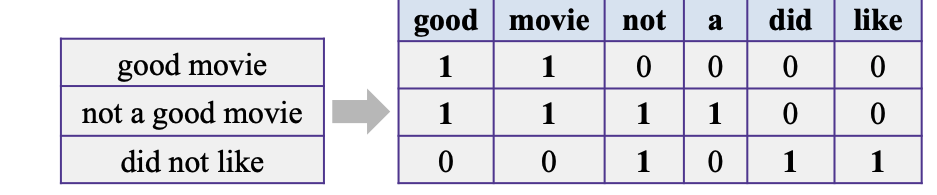







__TFIDF(Term Document Frequency and Inverse document Frequency) Vectorizer:__
  * Term Document Frequency:      
      A problem with the Bag of Words approach is that highly frequent words start to dominate in the document (e.g. larger score), but may not contain as much “informational content”. Also, it will give more weight to longer documents than shorter documents.              
      <i> TF = Number of times Wi(word wi) occure in Rj(Review J)/ Total Number of Words </i>
      
      <i> IDF = log(N/ni) </i>        
      
                                  N = Number of Douments or Reviews
      
                                  ni = Review which contain ni.
                                  
      <i> TFIDF = TF * IDF </i>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( stop_words='english',
        min_df=10, 
        ngram_range=(1, 4),
        max_features=25000)
vectorizer.fit(train['text'])
x_train_vector = vectorizer.transform(train['text'])
x_test_vector = vectorizer.transform(test['text'])

In [ ]:
x_train_vector.shape
x_test_vector.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( stop_words='english',
        min_df=10, 
        ngram_range=(1, 4),
        max_features=25000)
vectorizer.fit(train['text'])
tfidf_text = vectorizer.transform(train['text'])
tfidf_test_text = vectorizer.transform(test['text'])
print("Shape of matrix after Tfidf encodig ",tfidf_text.shape)

### Dimensionality Reduction

In [ ]:
#from yellowbrick.text import TSNEVisualizer
# plt.figure(figsize = [15,9])
# tsne = TSNEVisualizer()
# n = 20000
# target_names = ["Simple","Disaster"]
# tsne.fit(tfidf_text[:n], train.target[:n].map({1: target_names[1],0:target_names[0]}))
# tsne.show()

In [ ]:
train.columns

In [ ]:
test.columns

In [ ]:
temp_data= train.drop(['id', 'keyword', 'location', 'text', 'target'], axis = 1)
temp_test_data = test.drop(['id', 'keyword', 'location', 'text'], axis = 1)
temp_data.head()

In [ ]:
from scipy.sparse import hstack
data = hstack((temp_data, tfidf_text)).tocsr()

print (data.shape)
print (tfidf_text.shape)

In [ ]:
test_data = hstack((temp_test_data, tfidf_test_text))
print (test_data.shape)

In [ ]:
# # This function plots the confusion matrices given y_i, y_i_hat.
# def plot_confusion_matrix(test_y, predict_y):
#     C = confusion_matrix(test_y, predict_y)
#     # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
#     A =(((C.T)/(C.sum(axis=1))).T)
#     #divid each element of the confusion matrix with the sum of elements in that column
    
#     # C = [[1, 2],
#     #     [3, 4]]
#     # C.T = [[1, 3],
#     #        [2, 4]]
#     # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
#     # C.sum(axix =1) = [[3, 7]]
#     # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
#     #                           [2/3, 4/7]]

#     # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
#     #                           [3/7, 4/7]]
#     # sum of row elements = 1
    
#     B =(C/C.sum(axis=0))
#     #divid each element of the confusion matrix with the sum of elements in that row
#     # C = [[1, 2],
#     #     [3, 4]]
#     # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
#     # C.sum(axix =0) = [[4, 6]]
#     # (C/C.sum(axis=0)) = [[1/4, 2/6],
#     #                      [3/4, 4/6]] 
#     plt.figure(figsize=(20,4))
#     sns.set(font_scale=1.8)
    
#     labels = [1,2]
#     # representing A in heatmap format
#     cmap=sns.light_palette("blue")
#     plt.subplot(1, 3, 1)
#     sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
#     plt.xlabel('Predicted Class')
#     plt.ylabel('Original Class')
#     plt.title("Confusion matrix")
#     print ("**** Confusion Matrix ******")
#     print (C)
    
#     plt.subplot(1, 3, 2)
#     sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
#     plt.xlabel('Predicted Class')
#     plt.ylabel('Original Class')
#     plt.title("Precision matrix")
#     print ("**** Precision Matrix ******")
#     print (B)
    
#     plt.subplot(1, 3, 3)
#     # representing B in heatmap format
#     sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
#     plt.xlabel('Predicted Class')
#     plt.ylabel('Original Class')
#     plt.title("Recall matrix")
#     print ("**** Recall Matrix ******")
#     print (A)
    
#     plt.show()

In [ ]:
### Split data in train and cross validation and test

y = train.target

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state= 40, stratify= y)
print (X_train.shape)
print (X_test.shape)
print (y.shape)


### Building Machine learning Models:

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report

alpha = {'alpha':[10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]}

nb = BernoulliNB()
model = GridSearchCV(nb,alpha, scoring= 'f1')
model.fit(X_train, y_train)


In [ ]:
model.best_score_

In [ ]:
model.best_params_

In [ ]:
y_pred = model.predict(X_test)
f1 = make_scorer(f1_score , average='macro')

score = f1_score(y_test,y_pred,  average='macro')
print (score)
print (f1_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))

In [ ]:
y_test1 = model.predict(test_data)
train_pred1 = model.predict(data)

Random Forest

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


tuned_parameters = {
        "n_estimators": [1, 5, 10, 50, 100, 500], "max_depth": [1, 5, 10, 50, 100, 500]    
}

DT = RandomForestClassifier(criterion="gini", n_jobs= 6 , class_weight='balanced')
model = RandomizedSearchCV(DT, tuned_parameters, scoring='f1', cv=5, verbose = 10 )
model.fit(X_train, y_train)

In [ ]:
model.best_score_

In [ ]:
y_test2 = model.predict(test_data)
train_pred2 = model.predict(data)

In [ ]:
from scipy import stats
import xgboost as xgb

params = {
    "n_estimators": stats.randint(10, 300), 
    "max_depth": stats.randint(2, 10),    
    "learning_rate": stats.uniform(0.01, 1),
     "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}        
    
xg = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', reg_lambda=0, reg_alpha= 1)
model = RandomizedSearchCV(xg, params, scoring='f1',  cv=5, n_jobs= 3, random_state=12, n_iter= 10, verbose=10)
model.fit(X_train, y_train)

In [ ]:
model.best_score_

In [ ]:
y_test3 = model.predict(test_data)
train_pred3 = model.predict(data)

In [ ]:

pred_val_y = 0.3 * train_pred1 +  0.3 * train_pred2  + 0.4 * train_pred3 
#pred_test_y = 0.3 * test_pred1 + 0.3 * test_pred2 + 0.4 * test_pred4 

thresholds = []
for thresh in np.arange(0.1, 0.5, 0.01):
    thresh = np.round(thresh, 2)
    res = f1_score(y, (pred_val_y > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

In [ ]:
pred_test_y = y_test1 * 0.3 + y_test2 * 0.3 + y_test3 * 0.4
pred_test_y = (pred_test_y > best_thresh ).astype(int)

In [ ]:
submission_cv = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [ ]:
submission_cv.head()

In [ ]:
submission_cv.target = pred_test_y

In [ ]:
submission_cv

In [ ]:
submission_cv.to_csv("submission.csv", index=False)

In [ ]:
embeddings_index = {}
f = open(r'D:\Applied AI\My Case Study\Kaggle Quora\Assignment\glove.840B.300d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = ''.join(values[:-300])
    coefs = np.asarray(values[-300:], dtype='float32')
    embeddings_index[word] = coefs
f.close()